# Notebook to achieve some test

In [2]:
import numpy as np

mA1 = np.random.rand(4, 1)  # Example 4x1 matrix
mA2 = np.random.rand(4, 1)  # Example 4x1 matrix

deltaA = mA1.T - mA2  # This will produce a (4,4) matrix

print(deltaA)

[[-0.08257113  0.43155658  0.10972    -0.40152554]
 [ 0.04788025  0.56200796  0.24017138 -0.27107416]
 [ 0.26677129  0.780899    0.45906241 -0.05218312]
 [-0.4692178   0.04490991 -0.27692667 -0.78817221]]


In [3]:
N = 1024
Q = 2
n = np.expand_dims(np.arange(N),axis=1)
i = np.arange(Q+1)
n**i

array([[      1,       0,       0],
       [      1,       1,       1],
       [      1,       2,       4],
       ...,
       [      1,    1021, 1042441],
       [      1,    1022, 1044484],
       [      1,    1023, 1046529]], shape=(1024, 3))

In [4]:
from utilities.munkres import Munkres
import numpy as np
import time 
matrix_cost = np.random.random((200,100))

print(np.shape(matrix_cost))

m = Munkres()

t1 = time.time()
solution = m.compute(matrix_cost)
tstop = time.time()-t1

print(np.shape(solution))
print("time taken to compute solution:", tstop)

(200, 100)
(100, 2)
time taken to compute solution: 2.574815034866333


In [ ]:
from scipy.optimize import linear_sum_assignment
t1 = time.time()
solution2 = np.transpose(linear_sum_assignment(matrix_cost))
tstop = time.time()-t1

print(np.shape(np.transpose(solution2)))
print("time taken to compute solution:", tstop)

(2, 200)
time taken to compute solution: 0.000843048095703125


In [ ]:
print(solution == solution2)


[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  T

In [1]:
## Generation of a numpy sinwave with fluctuation 

import numpy as np
import scipy.io.wavfile as wav

# Parameters
fs = 44100  # Sampling rate (Hz)
duration = 5  # Duration of the sound (seconds)
f_base = 440  # Base frequency (Hz)
f_variation = 5  # Frequency variation depth (Hz)
modulation_rate = 0.5  # Frequency modulation rate (Hz)

# Time vector
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Frequency modulation
f_t = f_base + f_variation * np.sin(2 * np.pi * modulation_rate * t)

# Generate the sine wave with time-varying frequency
wave = np.sin(2 * np.pi * np.cumsum(f_t) / fs)

# Normalize to int16 for WAV file
wave_int16 = np.int16(wave * 32767)

# Save as WAV file
wav.write("sine_wave_variating.wav", fs, wave_int16)

print("WAV file generated: sine_wave_variating.wav")


WAV file generated: sine_wave_variating.wav


In [8]:
## Generation of a numpy sinwave with fluctuation 

import numpy as np
import scipy.io.wavfile as wav

# Parameters
fs = 44100  # Sampling rate (Hz)
duration = 1  # Duration of the sound (seconds)
f_base = 440  # Base frequency (Hz)

# Time vector
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Generate the sine wave with constant frequency
wave = np.sin(2 * np.pi * f_base / fs * t)

# Normalize to int16 for WAV file
wave_int16 = np.int16(wave * 32767)
print(np.shape(wave_int16))
# Save as WAV file
wav.write("sine_wave_1_440.wav", fs, wave_int16)

print("WAV file generated: sine_wave_1_440.wav")


(44100,)
WAV file generated: sine_wave_1_440.wav


In [27]:
Spectro = np.load("/Users/colas/Documents/Programmation/Python/Fast_Partial_Tracking_Python/Spectro_Sin8.npy")
Time = np.load("/Users/colas/Documents/Programmation/Python/Fast_Partial_Tracking_Python/Tracker_time.npy")
print(np.shape(Spectro))
print(np.shape(Time))

(578, 4096)
(578,)


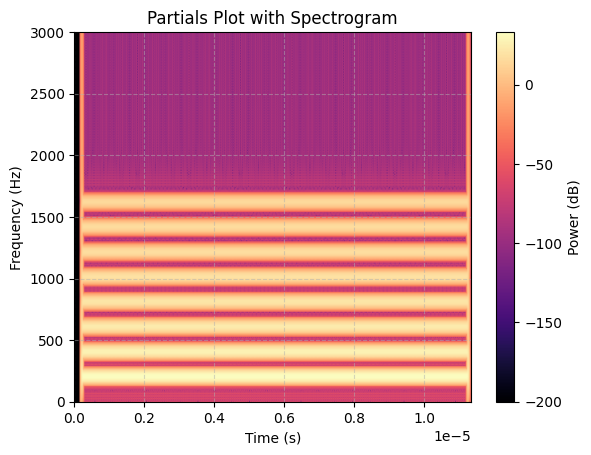

In [29]:
import matplotlib.pyplot as plt

Ndft = 4096

freqs = np.fft.rfftfreq(Ndft, d=1/fs)  # Compute correct frequency bins
time = freqs/fs
extent = [time[0] / fs, time[-1] / fs, freqs[0], freqs[-1]]  # Update extent
plt.imshow(20 * np.log10(np.abs(np.transpose(Spectro[:,:Ndft//2])+1e-10)), aspect='auto', extent = extent , origin='lower', cmap='magma')
    
plt.axis('tight')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Partials Plot with Spectrogram')
plt.colorbar(label="Power (dB)")
plt.ylim((0, 3000))
plt.show()